# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [25]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [22]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [5]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


Observamos dos variables categóricas y una numérica, sin valores nulos identificados.

In [9]:
temp.describe()

,Temperature
count,7.000000
mean,15.158730
std,6.695265
min,3.333333
25%,11.944444
50%,17.222222
75%,19.722222
max,22.222222


La media de la temperatura está en 15.15

#### Selecciona las filas en las que el estado es New York

In [23]:
temp[temp['State'] == 'New York'] 

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [24]:
temp[temp['State'] == 'New York']['Temperature'].mean() 

10.74074074074074

#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [26]:
temp[temp['Temperature'] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [38]:
cities=temp[temp['Temperature'] > 15]['City'].unique()
print(cities)

['NYC' 'Hartford' 'Treton' 'Newark']


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [45]:
condicion = (temp['Temperature'] > 15) & (temp['Temperature'] < 20)
new_cities = temp[condicion]['City'].unique()
print(new_cities)

['NYC' 'Hartford']


In [46]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [52]:
mean=temp.groupby('State')['Temperature'].mean()
print(mean)
std=temp.groupby('State')['Temperature'].std()
print(std)

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64
State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [60]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [58]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [59]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

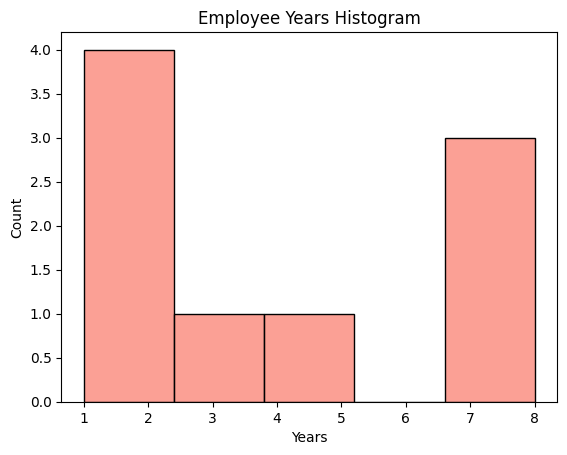

In [65]:
sns.histplot(x=employee.Years, color='salmon')
plt.title('Employee Years Histogram')
plt.show()

Obersvamos que la mayoría de los empleados lleva menos de 3 años en la empresa, seguido de uin grupo de gente que lleva más de 6,5 años en la empresa.

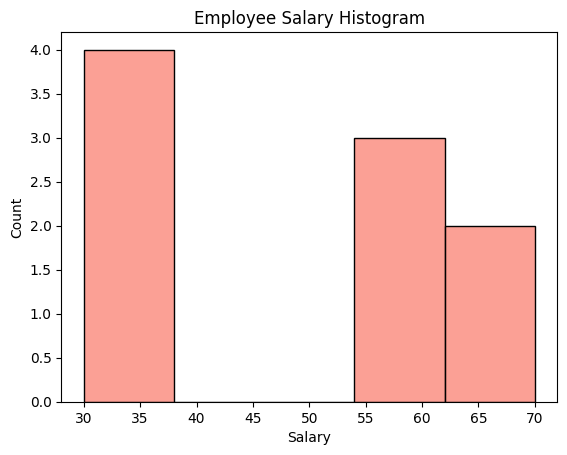

In [66]:
sns.histplot(x=employee.Salary, color='salmon')
plt.title('Employee Salary Histogram')
plt.show()

In [ ]:
Observamos como la mayor parte de los empleados cobra menos de 40k mientas, mientras el menor rango de salarios es el comprendido entre 60 y 70k.

#### ¿Cuál es el salario medio en esta empresa?

In [68]:
salary=employee['Salary'].mean()
print(f'El salario medio de la empresa es {salary} K')

El salario medio de la empresa es 48.888888888888886 K


#### ¿Cuál es el salario más alto?

In [72]:
salary_max=employee['Salary'].max()
print(f'El salario más alto de la empresa es {salary_max} K')

El salario más alto de la empresa es 70 K


#### ¿Cuál es el salario más bajo?

In [73]:
salary_min=employee['Salary'].min()
print(f'El salario más bajo de la empresa es {salary_min} K')

El salario más bajo de la empresa es 30 K


#### ¿Quiénes son los empleados con el salario más bajo?

In [75]:
trabajadores=employee[employee['Salary'] < 35]['Name'].unique()
print(trabajadores)
#cogemos los que cobran por debajo del primer percentil

['Maria' 'David']


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [77]:
employee[employee['Name']=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [78]:
employee[employee['Name']=='David']['Salary']

2    30
Name: Salary, dtype: int64

#### Printea todas las líneas en las que el cargo es asociado

In [79]:
employee[employee['Title']=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [80]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [85]:
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [87]:
condicion2 = (employee['Title'] == 'associate') & (employee['Salary'] > 55)
employees2 = employee[condicion2]['Name'].unique()
print(employees2)

['Pedro']


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [94]:
years=employee.groupby('Years')['Salary'].mean()
print(years)

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


#### ¿Cuál es el salario medio por título?

In [95]:
salary=employee.groupby('Title')['Salary'].mean()
print(salary)

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

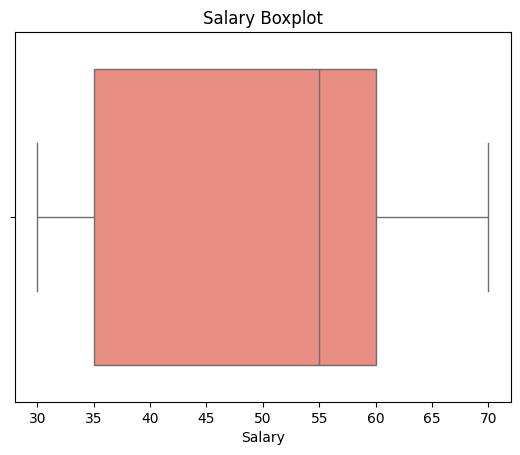

In [96]:
sns.boxplot(x="Salary", data=employee, color='salmon')
plt.title('Salary Boxplot')
plt.show()

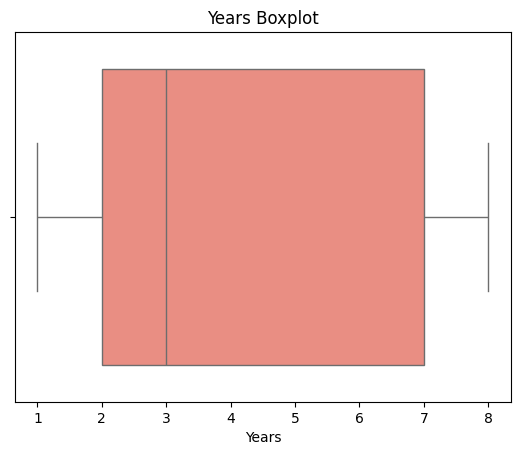

In [98]:
sns.boxplot(x="Years", data=employee, color='salmon')
plt.title('Years Boxplot')
plt.show()

#### ¿Es diferente el salario medio por género?

In [100]:
gender=employee.groupby('Gender')['Salary'].mean()
print(gender)

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [101]:
min_dep=employee.groupby('Department')['Salary'].min()
print(min_dep)

Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64


In [102]:
mean_dep=employee.groupby('Department')['Salary'].mean()
print(mean_dep)

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [103]:
max_dep=employee.groupby('Department')['Salary'].max()
print(max_dep)

Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [107]:
resultados = employee.groupby('Department')['Salary'].agg(max_salario='max', min_salario='min')
resultados['Diferencia'] = resultados['max_salario'] - resultados['min_salario']
resultados

,max_salario,min_salario,Diferencia
Department,,,
HR,70,30,40
IT,70,30,40
Sales,55,55,0


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [ ]:
pedidos = pd.read_csv('Orders.csv')
pedidos.head()

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [ ]:
pedidos.info()

In [110]:
pedidos.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


#### ¿Cuál es el precio medio de compra?

In [114]:
pedidos['UnitPrice'].mean()

3.1161744805540756

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [115]:
pedidos['UnitPrice'].max()

8142.75

In [116]:
pedidos['UnitPrice'].min()

0.0

#### Seleccione todos los clientes que tenemos en España

In [130]:
 pedidos[pedidos['Country']=='Spain']['CustomerID'].unique()


array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [131]:
pedidos[pedidos['Country'] == 'Spain']['CustomerID'].nunique()

30

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [133]:
group=pedidos.groupby('CustomerID')['Quantity'].sum()
group[group > 50].index.tolist()

[12346,
 12347,
 12348,
 12349,
 12350,
 12352,
 12354,
 12355,
 12356,
 12357,
 12358,
 12359,
 12360,
 12361,
 12362,
 12363,
 12364,
 12365,
 12367,
 12370,
 12371,
 12372,
 12373,
 12374,
 12375,
 12377,
 12378,
 12379,
 12380,
 12381,
 12383,
 12384,
 12386,
 12388,
 12390,
 12391,
 12393,
 12394,
 12395,
 12397,
 12398,
 12399,
 12402,
 12403,
 12405,
 12406,
 12407,
 12408,
 12409,
 12410,
 12412,
 12413,
 12414,
 12415,
 12417,
 12418,
 12420,
 12421,
 12422,
 12423,
 12424,
 12425,
 12426,
 12427,
 12428,
 12429,
 12430,
 12431,
 12432,
 12433,
 12434,
 12435,
 12436,
 12437,
 12438,
 12441,
 12442,
 12444,
 12445,
 12446,
 12447,
 12448,
 12449,
 12450,
 12451,
 12452,
 12453,
 12454,
 12455,
 12456,
 12457,
 12458,
 12461,
 12462,
 12463,
 12464,
 12465,
 12468,
 12471,
 12472,
 12473,
 12474,
 12475,
 12476,
 12477,
 12478,
 12479,
 12480,
 12481,
 12483,
 12484,
 12488,
 12489,
 12490,
 12491,
 12492,
 12493,
 12494,
 12497,
 12498,
 12500,
 12501,
 12502,
 12504,
 12507,


#### Selecciona pedidos de España superiores a 50 artículos

In [135]:
pedidos_espana = pedidos[pedidos['Country'] == 'Spain']
pedidos_espana_agrupados = pedidos_espana.groupby('InvoiceNo')['Quantity'].sum()

pedidos_mas_de_50 = pedidos_espana_agrupados[pedidos_espana_agrupados > 50].index.tolist()
pedidos_mas_de_50

[536944,
 538095,
 538525,
 539351,
 540469,
 540550,
 540785,
 540801,
 541491,
 541980,
 542303,
 542905,
 543055,
 543541,
 543822,
 545585,
 545647,
 546755,
 546760,
 547387,
 547703,
 547790,
 547972,
 549682,
 550911,
 551398,
 551868,
 552040,
 555095,
 555470,
 555726,
 556241,
 557007,
 557297,
 557303,
 557314,
 558871,
 559135,
 559148,
 559173,
 559665,
 560607,
 561093,
 561669,
 562273,
 563477,
 563518,
 564201,
 564734,
 565519,
 566040,
 567340,
 567653,
 567968,
 568001,
 568179,
 568554,
 569998,
 571255,
 571665,
 571851,
 572065,
 572442,
 572886,
 573362,
 574301,
 574550,
 575144,
 575514,
 575707,
 577039,
 577125,
 577476,
 577523,
 577606,
 578321,
 578339,
 579503,
 580955,
 581193]

#### Seleccionar todos los pedidos gratuitos

In [137]:
pedidos_gratis = pedidos[pedidos['UnitPrice'] == 0]
pedidos_gratis

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [138]:
pedidos_lunch_bag = pedidos[pedidos['Description'].str.contains('lunch bag', case=False)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [141]:
pedidos_2011_lunch_bag = pedidos[(pedidos['year'] == 2011) & (pedidos['Description'].str.contains('lunch bag', case=False))]

#### Muestra la distribución de frecuencias del importe gastado en España.

In [ ]:
sns.histplot(x=pedidos.amount_spent, color='salmon')
plt.title('Amount spent Histogram')
plt.show()

#### Seleccione todos los pedidos realizados en el mes de agosto

In [ ]:
pedidos_agosto = pedidos[pedidos['month'] == 08]

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [ ]:
pedidos_por_pais = pedidos_agosto['Country'].value_counts()
pedidos_por_pais

#### ¿Cuál es el gasto medio por país?

In [ ]:
employee.groupby('Country')['amount_spent'].mean()

#### ¿Cuál es el artículo más caro?

In [ ]:
employee.groupby('Description')['UnitPrice'].max()

#### ¿Cuál fue la cantidad media gastada al año?

In [ ]:
employee.groupby('year')['Quantity'].mean